# Convolutional Neural Network - CIFAR10 raw data using Keras

This notebook will guide you through the use of the `keras` package to train different types of CNN for image recognition. You are going to use the `CIFAR10` dataset.


## Loading the packages

In [1]:
import numpy as np
from matplotlib import pyplot as plt

#we import various classes from keras to simplify usage below (no need to preceed declaration by namespace 'tensorflow.keras...'
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, Activation, BatchNormalization, MaxPooling2D, InputLayer
from tensorflow.keras import utils
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers

from sklearn import metrics as me

%matplotlib inline

2024-04-12 08:39:00.216143: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-12 08:39:00.821111: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Loading the raw data
First load the `cifar10` dataset and normalize all values to be in the range [0, 1]

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print('original data type : ', X_train.dtype)
print('original data range [', np.min(X_train), ',', np.max(X_train),']')

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

print('\nconverted data type : ', X_train.dtype)
print('converted data range [', np.min(X_train), ',', np.max(X_train),']')

print('\ntraining data shape : ', X_train.shape)
print('testing data shape  : ', X_test.shape)

original data type :  uint8
original data range [ 0 , 255 ]

converted data type :  float32
converted data range [ 0.0 , 1.0 ]

training data shape :  (50000, 32, 32, 3)
testing data shape  :  (10000, 32, 32, 3)


Define a function to plot some images from CIFAR; rows correspond to same class

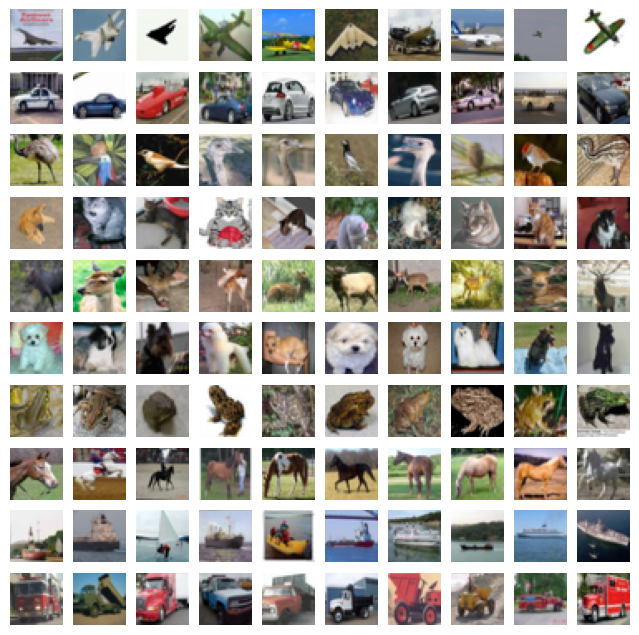

In [3]:
def show_imgs(X,y):
    plt.figure(1, figsize=(8,8))
    k = 0
    for i in range(0,10):
        for j in range(0,10):
            while y[k] != i: k += 1
            plt.subplot2grid((10,10),(i,j))
            plt.imshow(X[k])
            plt.axis('off')
            k += 1
    plt.show()


show_imgs(X_test, y_test)


The target values of the network are supposed to be 1-hot targets. Now the `y_train` is an array with scalar values as in `[5 0 4 1 ...]` and it should be a 1-hot array `Y_train` as in : 

`[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]...]`
 
Note the change of capital letter in the `Y_train` to denote, per convention, an array with multiple dimensions.

In [4]:
n_classes = 10
Y_train = utils.to_categorical(y_train, n_classes)
Y_test = utils.to_categorical(y_test, n_classes)
print(Y_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


## Define the network
The neural network will be a CNN. We will train through E epochs, using batches of size B. We can try with 30 epochs and batches of 128 images.

In [5]:
E = 20                # number of epochs
B = 256                # batch size
V = 0.2               # validation split

### START YOUR CODE ###
np.random.seed(1000)
np.random.shuffle(X_train)
X_val = X_train[:int(V*len(X_train))]
Y_val = Y_train[:int(V*len(Y_train))]
X_train = X_train[int(V*len(X_train)):]
Y_train = Y_train[int(V*len(Y_train)):]

# CNN 1
cnn1 = Sequential()
cnn1.add(InputLayer(input_shape=(32, 32, 3)))
cnn1.add(Conv2D(16, kernel_size=(3, 3)))
cnn1.add(Activation('relu'))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Conv2D(32, kernel_size=(3, 3)))
cnn1.add(Activation('relu'))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Flatten())
cnn1.add(Dense(200, activation='relu'))
cnn1.add(Dense(10, activation='softmax'))

# CNN 2
cnn2 = Sequential()
cnn2.add(InputLayer(input_shape=(32, 32, 3)))
cnn2.add(Conv2D(16, kernel_size=(3, 3)))
cnn2.add(Activation('relu'))
cnn2.add(MaxPooling2D(pool_size=(2, 2)))
cnn2.add(Conv2D(32, kernel_size=(3, 3)))
cnn2.add(Activation('relu'))
cnn2.add(MaxPooling2D(pool_size=(2, 2)))
cnn2.add(Flatten())
cnn2.add(Dropout(0.3))
cnn2.add(Dense(300, activation='relu'))
cnn2.add(Dropout(0.3))
cnn2.add(Dense(10, activation='softmax'))

# CNN 3
cnn3 = Sequential()
cnn3.add(InputLayer(input_shape=(32, 32, 3)))
cnn3.add(Activation('relu'))
cnn3.add(Conv2D(32, kernel_size=(3, 3)))
cnn3.add(Activation('relu'))
cnn3.add(MaxPooling2D(pool_size=(2, 2)))
cnn3.add(Conv2D(64, kernel_size=(3, 3)))
cnn3.add(Activation('relu'))
cnn3.add(Conv2D(64, kernel_size=(3, 3)))
cnn3.add(Activation('relu'))
cnn3.add(MaxPooling2D(pool_size=(2, 2)))
cnn3.add(Flatten())
cnn3.add(Dropout(0.3))
cnn3.add(Dense(300, activation='relu'))
cnn3.add(Dropout(0.3))
cnn3.add(Dense(10, activation='softmax'))

# CNN 4
cnn4 = Sequential()
cnn4.add(InputLayer(input_shape=(32, 32, 3)))
cnn4.add(Conv2D(32, kernel_size=(3, 3)))
cnn4.add(Activation('relu'))
cnn4.add(Conv2D(32, kernel_size=(3, 3)))
cnn4.add(Activation('relu'))
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Conv2D(64, kernel_size=(3, 3)))
cnn4.add(Activation('relu'))
cnn4.add(Conv2D(64, kernel_size=(3, 3)))
cnn4.add(Activation('relu'))
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Conv2D(128, kernel_size=(3, 3)))
cnn4.add(Activation('relu'))
cnn4.add(Conv2D(128, kernel_size=(3, 3)))
cnn4.add(Activation('relu'))
cnn4.add(MaxPooling2D(pool_size=(1, 1)))
cnn4.add(Flatten())
cnn4.add(Dropout(0.3))
cnn4.add(Dense(300, activation='relu'))
cnn4.add(Dropout(0.3))
cnn4.add(Dense(10, activation='softmax'))


# CNN 5
cnn5 = Sequential()
cnn5.add(InputLayer(input_shape=(32, 32, 3)))
cnn5.add(Conv2D(96, kernel_size=(5,5),padding='same'))
cnn5.add(Activation('relu'))
cnn5.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
cnn5.add(Conv2D(80, kernel_size=(5,5),padding='same'))
cnn5.add(Activation('relu'))
cnn5.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
cnn5.add(Conv2D(96, kernel_size=(5,5),padding='same'))
cnn5.add(Activation('relu'))
cnn5.add(Conv2D(64, kernel_size=(5,5),padding='same'))
cnn5.add(Activation('relu'))
cnn5.add(Flatten())
cnn5.add(Dense(256, activation='relu'))
cnn5.add(Dropout(0.3))
cnn5.add(Dense(10, activation='softmax'))

### END YOUR CODE ###,

cnn1.summary()
cnn2.summary()
cnn3.summary()
cnn4.summary()

/home/olivier/anaconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
2024-04-12 08:39:03.595296: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-12 08:39:03.616522: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │       230,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 237,698 (928.51 KB)

 Trainable params: 237,698 (928.51 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 300)            │       345,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 353,998 (1.35 MB)

 Trainable params: 353,998 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ activation_4 (Activation)       │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 300)            │       480,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 539,630 (2.06 MB)

 Trainable params: 539,630 (2.06 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 1, 1, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 300)            │        38,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,718 (1.25 MB)

 Trainable params: 328,718 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

## Compile and train the network
In Keras, we call the methods `compile()` and `fit()`. For the compile phase, we need to specify the **loss** function which should be set in the case of multi-class classification to `categorical_crossentropy`. We also need to specify the optimizer strategy. In this case the `rmsprop` or `adam` can be used.

In [6]:

def train_cnn(cnn, X_train, Y_train, X_val, Y_val, batch_size=B, n_epochs=E):
    opt = optimizers.RMSprop(learning_rate=0.0001)
    opt = optimizers.Adam(learning_rate=0.001)
    cnn.compile(loss='categorical_crossentropy', optimizer=opt,
              metrics=['accuracy'])
    log = cnn.fit(X_train, Y_train, batch_size=batch_size, epochs=n_epochs,
               verbose=1, validation_data=(X_val, Y_val))
    return log

## Evaluate the network

We can do this at three levels: (1) plot of the loss during the training phase, (2) overall accuracy evaluation on test set and (3) per class evaluation with confusion matrix on test set.

### Loss evolution during training
This can be done first looking at the history of the training (output of the `fit()` function).

In [7]:
def plot_history(log):   
   f = plt.figure(figsize=(12,4))
   ax1 = f.add_subplot(121)
   ax2 = f.add_subplot(122)
   ax1.plot(log.history['loss'], label='Training loss')
   ax1.plot(log.history['val_loss'], label='Testing loss')
   ax1.legend()
   ax1.grid()
   ax2.plot(log.history['accuracy'], label='Training acc')
   ax2.plot(log.history['val_accuracy'], label='Testing acc')
   ax2.legend()
   ax2.grid()

## Training of the other CNNs

In [8]:
import tensorflow as tf

logs = []
with tf.device('/gpu:0'):
    for i, cnn in enumerate([cnn1, cnn2, cnn3, cnn4], start=1):
        print(f'Training CNN {i}...')
        log = train_cnn(cnn, X_train, Y_train, X_val, Y_val)
        logs.append(log)


Training CNN 1...
Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.0991 - loss: 2.3073 - val_accuracy: 0.0973 - val_loss: 2.3029
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.1076 - loss: 2.3018 - val_accuracy: 0.1003 - val_loss: 2.3034
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.1135 - loss: 2.2996 - val_accuracy: 0.1007 - val_loss: 2.3080
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.1233 - loss: 2.2933 - val_accuracy: 0.1023 - val_loss: 2.3088
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.1353 - loss: 2.2805 - val_accuracy: 0.1021 - val_loss: 2.3182
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.1498 - loss: 2.2577 - val_accuracy: 0.0962 - val_loss: 2.3435
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.1777 - loss: 2.2110 - val_accuracy: 0.1012 - val_loss: 2.3642
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.2265 - loss:

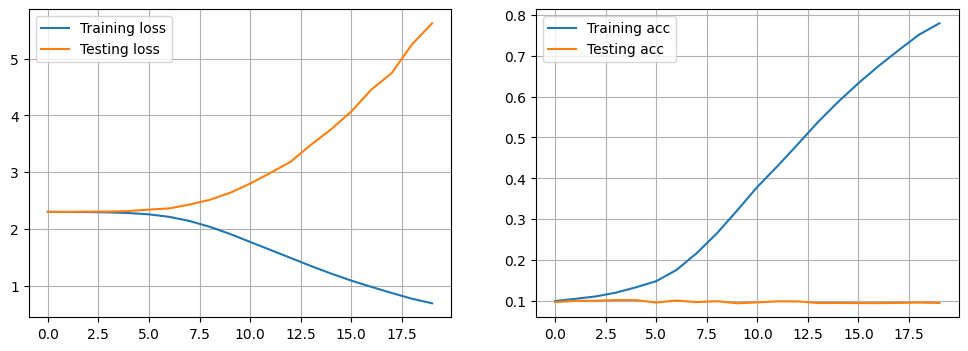

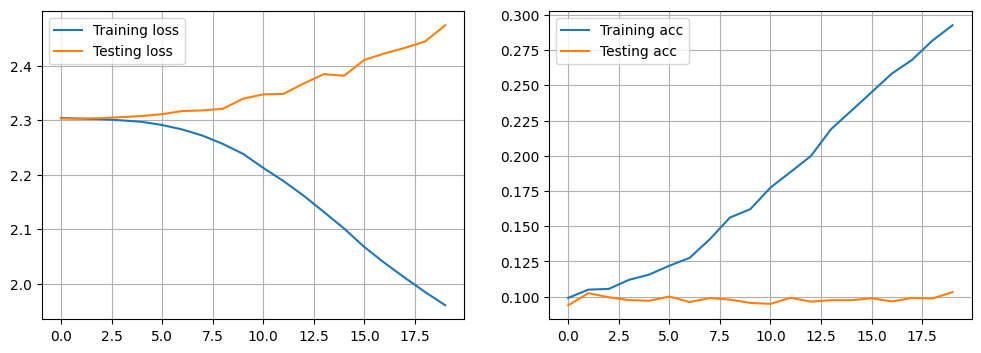

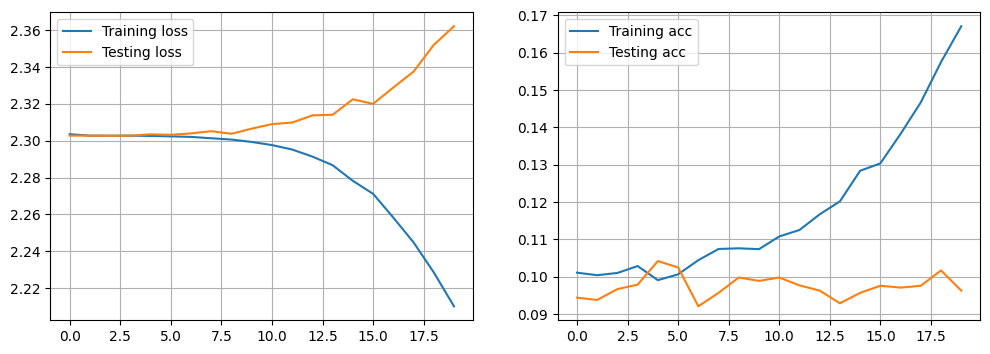

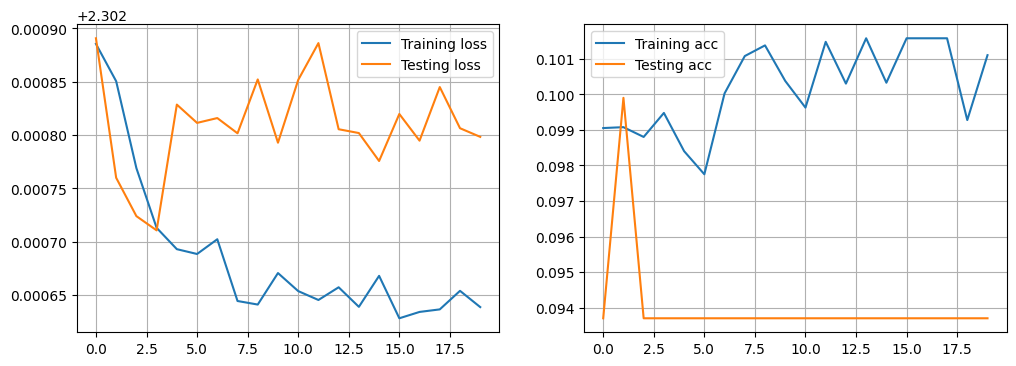

In [9]:
for log in logs:
    plot_history(log)

### Model evaluation
We can compute the overall performance on test set calling the `evaluate()` function on the model. The function returns the loss and the metrics used to compile the models.

In [10]:
loss_test1, acc_test1 = cnn1.evaluate(X_test, Y_test, verbose=0)
print('Test loss CNN1: ', loss_test1)
print('Test accuracy CNN1: ', acc_test1)

Test loss CNN1:  5.628021240234375
Test accuracy CNN1:  0.09510000050067902


In [11]:
loss_test2, acc_test2 = cnn2.evaluate(X_test, Y_test, verbose=0)
print('Test loss CNN2: ', loss_test2)
print('Test accuracy CNN2: ', acc_test2)

Test loss CNN2:  2.464766263961792
Test accuracy CNN2:  0.10220000147819519


In [12]:
loss_test3, acc_test3 = cnn3.evaluate(X_test, Y_test, verbose=0)
print('Test loss CNN3: ', loss_test3)
print('Test accuracy CNN3: ', acc_test3)

Test loss CNN3:  2.353428840637207
Test accuracy CNN3:  0.10050000250339508


In [13]:
loss_test4, metric_test4 = cnn4.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss_test4)
print('Test accuracy:', metric_test4)

Test loss: 2.3026111125946045
Test accuracy: 0.10000000149011612


### Confusion matrix
We can use the `predict()` function to get the predicted classes via `argmax`. The output is an array with the predicted class labels as in `[5 0 4 1 ...]`. The output array of ground truth `y_test` and the predicted classes can then be fed to the `confusion_matrix()` function of [sklearn metrics package](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix).

In [14]:
pred = np.argmax(cnn1.predict(X_test, verbose=0), axis=1)
confusion = me.confusion_matrix(y_test, pred)

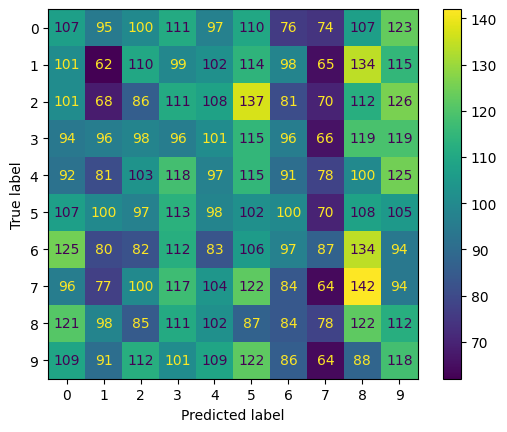

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion).plot();


## Compute and display accuracy results

### Table of results

- number of epochs : 10
- batch size : 128
- validation split : 0.2

The table below shows the results of the different CNNs trained on the CIFAR10 dataset. The cnn architectures can be found in the 5th cell of the notebook.

| CNN | Architecture description | Acc. train | Acc. val  | Acc. test | 
|-----|--------------------------|------------|-----------|-----------|
|  1  | cnn1                     |       |      |      |
|  2  | cnn2                     |       |       |       |
|  3  | cnn3                     |       |      |     |
|  4  | cnn4                     |        |       |     |
